# Refazendo Seminario em Python

In [53]:
#Importando Bibliotecas
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportion_confint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


# Introdução

No dia 10 de abril de 1912, o maior transatlântico já construído até então zarpava do porto de Southampton, na Inglaterra, com destino a Nova York, em sua viagem inaugural. Na madrugada do dia 14 para o dia 15 de abril, o luxuoso transatlântico colidiu com um iceberg no Atlântico Norte por volta da meia-noite, afundando em menos de três horas.

Foram 1.517 pessoas mortas e 706 sobreviventes, dos 2.223 passageiros e tripulantes, de acordo com o relatório do Senado dos Estados Unidos sobre o desastre.

In [4]:
Base = pd.read_csv('train.csv')             #Lendo a Base de dados e atribuindo ao objeto Base
Base['Age'] = Base['Age'].fillna(Base['Age'].median())          #Preenchendo NAs com a mediana na coluna Age
Base['Sex'] = np.where(Base.Sex == 'male',0,1)

Para esse trabalho vamos utilizar a base de dados do titanic do kaggle.

In [5]:
Base.head(10)       #Mostrando 20 linhas da base

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


### Informações sobre a base de dados
 Homens = 0 e Mulheres = 1
 
 Sobrevivente = 1 e Morto = 0

In [6]:
Base.describe()         #Descrição da base de dados com algumas informações.  

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


# Histograma de Sobreviventes, Classes e Sexo

(array([216., 184., 491.]),
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <BarContainer object of 3 artists>)

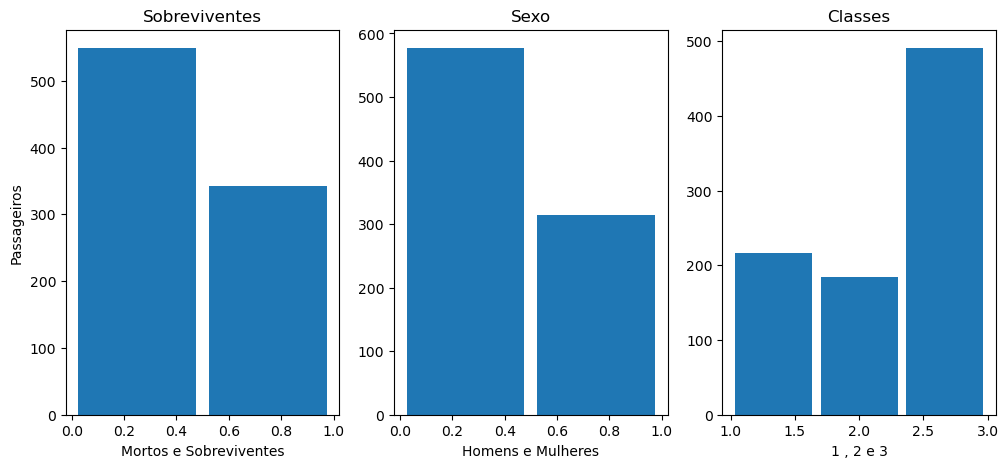

In [7]:
fig, ax = plt.subplots(1,3,figsize=(12,5))          #Criando figura com subplots(1 linha e 3 colunas)

ax[0].set_title('Sobreviventes')                    #Título do subplot
ax[0].set_ylabel('Passageiros')                     #Nome do eixo Y
ax[0].set_xlabel('Mortos e Sobreviventes')          #Nome do eixo X
ax[0].hist(Base.Survived,2,rwidth=0.9)              #Histograma de Sobreviventes com 2 colunas

ax[1].set_title('Sexo')                             #Título do subplot
ax[1].set_xlabel('Homens e Mulheres')               #Nome do eixo X
ax[1].hist(Base.Sex,2,rwidth=0.9)                   #Histograma de Sexo com 2 colunas

ax[2].set_title('Classes')                          #Título do subplot
ax[2].set_xlabel('1 , 2 e 3')                       #Nome do eixo X
ax[2].hist(Base.Pclass,3,rwidth=0.9)                #Histograma de Classes com 3 colunas

No primeiro histograma é possível observar a distribuição da quantidade de pessoas que sobreviveram e que morreram. Como foi utilizado o sistema binário para definir sobreviventes como 1 e mortos como 0 (eixo x), é possível perceber através do gráfico que a quantidade de pessoas mortas foi maior do a de sobreviventes (eixo y). 

No segundo histograma é possível observar a quantidade de pessoas que estavam a bordo (eixo y) separadas por classes (1, 2 e 3 no eixo x). Percebe-se através do gráfico que a maior parte das pessoas que estavam no Titanic eram da Terceira, Primeira e Segunda classe, respectivamente. Sendo a Terceira classe predominantemente maior com aproximadamente 500 pessoas, sendo pelo menos o dobro de alguma das demais classes. 

O terceiro histograma mede a quantidade de pessoas segmentada pelos sexos feminino e masculino. Foi utilizado o sistema binário para definir Homens como 0 e Mulheres como 1. Foi possível interpreter que a quantidade de homens a bordo era superior do que a de mulheres.


# Boxplot de Idade e Fare

{'whiskers': [<matplotlib.lines.Line2D at 0x23624c9f280>,
 'caps': [<matplotlib.lines.Line2D at 0x23624c9f7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23624c90fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x23624c9fd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x23624c9ffd0>],
 'means': []}

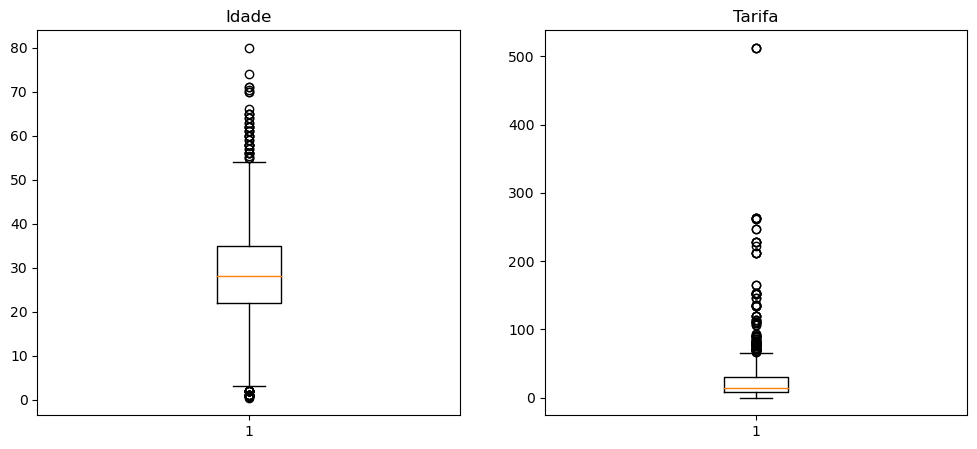

In [8]:
fig1, ax1 = plt.subplots(1,2,figsize=(12,5))            #Criando figura com subplots(1 linha e 2 colunas)

ax1[0].set_title('Idade')                               #Título
ax1[0].boxplot(Base.Age)                                #Criando boxplot da coluna Age

ax1[1].set_title('Tarifa')                              #Título
ax1[1].boxplot(Base.Fare)                               #Criando boxplot da coluna Fare

No boxplot acima podemos estimar as idades e fare dos passageiros no geral.

# Gráfico de correlação da base de dados

C:\Users\vande\AppData\Local\Temp\ipykernel_27828\1831468895.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Base.corr().round(2), annot = True)         #gráfico de correlação usando biblioteca seaborn(sns) e arredondando para 2 casas decimais


<AxesSubplot: >

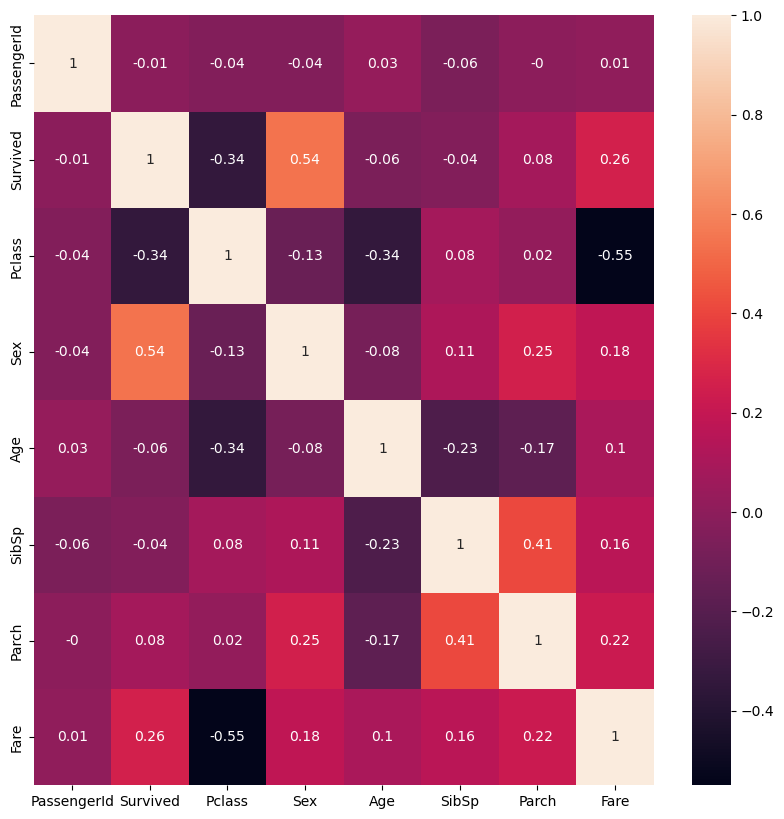

In [9]:
plt.figure(figsize=(10,10))             #Criando imagem e definindo tamanho
sns.heatmap(Base.corr().round(2), annot = True)         #gráfico de correlação usando biblioteca seaborn(sns) e arredondando para 2 casas decimais

Foi realizado o teste de correlação entre as variáveis para procurar entender se suas respctivas variações apresentariam alguma relação. Apesar de não ter notado nenhuma correlação forte, isto é, próxima de 1 ou -1, a variável “Sex” apresentou a maior relação com o número de sobreviventes, sendo esta uma correlação positiva, ou seja, quando uma aumenta, a outra aumenta também. No sistema binário tanto mulheres quanto sobreviventes correspondiam ao número 1. Desta forma, a correlação sugere que mulheres e sobreviventes estavam correlacionados.

### Obtendo total de mulheres sobreviventes

In [10]:
ms = Base[(Base.Sex == 1 ) & (Base.Survived == 1)]      #Filtrando mulheres sobreviventes
ms = len(ms)                #Obtendo quantidade através do tamanho do dataframe
ms

233

### Obtendo total de sobreviventes

In [11]:
ts = Base[Base.Survived == 1]
ts = len(ts)
ts

342

### Teste de proporção de mulheres sobreviventes

In [12]:
print(proportion_confint(ms,ts))             #Intervalo de confiança da proporção
print(proportions_ztest(ms,ts,0.5))
print(round(ms/ts,2))


(0.6319009716644249, 0.7306721277507798)
(7.1947139709042505, 6.259183826006731e-13)
0.68


Ao perceber a correlação entre mulheres e sobreviventes, foi feito um teste de proporção, onde foi concluído com 95% de confiança, que embora a quantidade de homens a bordo fosse maior, dentre o número absoluto de sobreviventes, 68% eram mulheres.

# Criando base de passageiros por classe

In [13]:
warnings.filterwarnings("ignore")
Base3 = Base[['Survived','Pclass']]           #Base por classe
Base3['C1'] = np.where(Base3.Pclass == 1,1,0)
Base3['C2'] = np.where(Base3.Pclass == 2,1,0)
Base3['C3'] = np.where(Base3.Pclass == 3,1,0)
Base3.head(5)

,Survived,Pclass,C1,C2,C3
0,0,3,0,0,1
1,1,1,1,0,0
2,1,3,0,0,1
3,1,1,1,0,0
4,0,3,0,0,1


# Gráfico de correlação por classes

<AxesSubplot: >

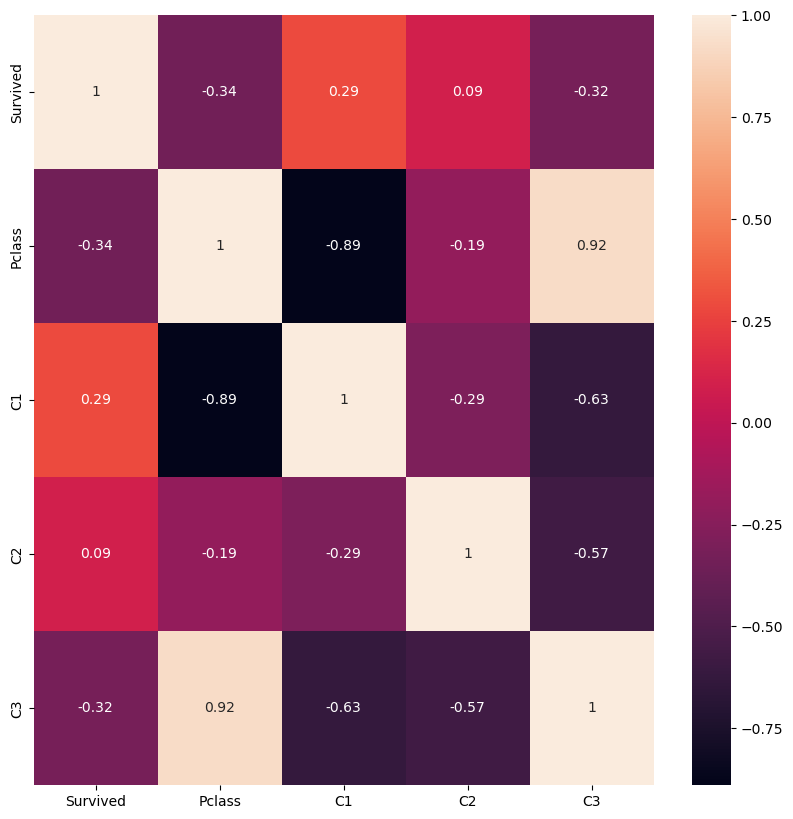

In [14]:
plt.figure(figsize=(10,10))             #Criando imagem e definindo tamanho
sns.heatmap(Base3.corr().round(2), annot = True)

Ao analisar o gráfico acima, foi percebida uma correlação positiva entre sobreviventes e a primeira classe e uma correlação negativa entre sobreviventes e a terceira classe. Isto é, o número de sobreviventes e pessoas da primeira classe crescem na mesma direção, enquanto o número de pessoas da terceira classe crescem na mesma direção que o número de mortos. 
Apesar de entender que as classes poderiam, mesmo que de forma sutil (baixa correlação) ter influenciado no “poder de sobrevivência”, foi feita a estratificação das classes por sexo, a fim de entender melhor, se dentro de cada sexo as classes foram um fator determinante.

# Comparações por Classe

### Obtendo mulheres sobreviventes da classe 1 e total de de mulheres da classe 1

In [15]:
# Obtendo mulheres sobreviventes da classe 1
msc1 = Base[(Base.Pclass == 1 ) & (Base.Survived == 1) & (Base.Sex == 1)]      
msc1 = len(msc1)                
print(msc1)
# Obtendo total de mulheres da classe 1
tmc1 = Base[(Base.Pclass == 1) & (Base.Sex == 1)]
tmc1 = len(tmc1)
print(tmc1)

91
94


### Teste de proporção das mulheres sobreviventes da classe 1

In [16]:
print(proportion_confint(msc1,tmc1))             #Intervalo de confiança da proporção
print(proportions_ztest(msc1,tmc1,0.5))
print(round(msc1/tmc1,2))            

(0.9325516352530691, 1.0)
(25.818754009596567, 5.460783834601893e-147)
0.97


### Obtendo mulheres sobreviventes da classe 3 e total de de mulheres da classe 3

In [17]:
# Obtendo mulheres sobreviventes da classe 3
msc3 = Base[(Base.Pclass == 3 ) & (Base.Survived == 1) & (Base.Sex == 1)]      
msc3 = len(msc3)                
print(msc3)
# Obtendo total de mulheres da classe 3
tmc3 = Base[(Base.Pclass == 3) & (Base.Sex == 1)]
tmc3 = len(tmc3)
print(tmc3)


72
144


### Teste de proporção das mulheres sobreviventes da classe 3

In [18]:
print(proportion_confint(msc3,tmc3))            #Intervalo de confiança da proporção
print(proportions_ztest(msc3,tmc3,0.5))        #Descarta a hipótese alternativa pois na classe 3 exatamente a metade das mulheres sobreviveram
print(round(msc3/tmc3,2))

(0.4183348339774977, 0.5816651660225023)
(0.0, 1.0)
0.5


A partir dos testes realizados, foi possível perceber que dentro do sexo feminino, as classes tiveram comportamento de sobreviventes diferentes, onde a primeira classe aparentou ter maior chance de sobreviver do que a terceira: 97% das mulheres da primeira classe sobreviveram enquanto 50% das mulheres da terceira classe sobreviveram.

### Obtendo homens sobreviventes da classe 1 e total de de homens da classe 1

In [19]:
# Obtendo homens sobreviventes da classe 1
hsc1 = Base[(Base.Sex == 0) & (Base.Survived == 1) & (Base.Pclass == 1)]
hsc1 = len(hsc1)
print(hsc1)
# Obtendo total de homens da classe 1
thc1 = Base[(Base.Sex == 0) & (Base.Pclass == 1)]
thc1 = len(thc1)
print(thc1)


45
122


### Teste de proporção de homens sobreviventes da classe 1

In [20]:
print(proportion_confint(hsc1,thc1))            #Intervalo de confiança da proporção
print(proportions_ztest(hsc1,thc1,0.5))            #Não podemos descartar a hipótese nula. Menos de 50% dos homens da classe 1 sobreviveram.
print(round(hsc1/thc1,2))

(0.2832354672379669, 0.45446945079482004)
(-3.0022598511061984, 0.0026798331913469088)
0.37


### Obtendo homens sobreviventes da classe 3 e total de de homens da classe 3

In [21]:
# Obtendo homens sobreviventes da classe 3
hsc3 = Base[(Base.Sex == 0) & (Base.Survived == 1) & (Base.Pclass == 3)]
hsc3 = len(hsc3)
print(hsc3)
# Obtendo total de homens da classe 3
thc3 = Base[(Base.Sex == 0) & (Base.Pclass == 3)]
thc3 = len(thc3)
print(thc3)

47
347


### Teste de proporção de homens sobreviventes da classe 3

In [22]:
print(proportion_confint(hsc3,thc3))            #Intervalo de confiança da proporção
print(proportions_ztest(hsc3,thc3,0.5))         #Não podemos descartar a hipótese nula. Menos de 50% dos homens da classe 3 sobreviveram.
print(round(hsc3/thc3,2))

(0.09944163448599802, 0.17145173727192703)
(-19.844753402062032, 1.2232728571920844e-87)
0.14


A partir dos testes realizados, foi possível perceber que dentro do sexo masculino, as classes tiveram comportamento de sobreviventes diferentes, onde a primeira classe aparentou ter maior chance de sobreviver do que a terceira: 37% dos homens da primeira classe sobreviveram enquanto 14% dos homens da terceira classe sobreviveram.

# Comparações por Tarifa

### Obtendo quantidade de passageiros por valor pago

In [23]:
# Obtendo quantidade de passageiros por valor pago 31, 14 , 7
maior31 = Base[(Base.Fare >= 31)]
maior31 = len(maior31)
print(maior31)
maior14 = Base[(Base.Fare < 31) & (Base.Fare >= 14)]
maior14 = len(maior14)
print(maior14)
menor14 = Base[(Base.Fare < 14)]
menor14 = len((menor14))
print(menor14)

225
230
436


### Obtendo quantidade de passageiros sobreviventes pelo valor pago

In [24]:
surv31 = Base[(Base.Fare >= 31) & (Base.Survived == 1)]
surv31 = len(surv31)
print(surv31)
surv14 = Base[(Base.Fare < 31) & (Base.Fare >= 14) & (Base.Survived == 1)]
surv14 = len(surv14)
print(surv14)
surv0 = Base[(Base.Fare < 14) & (Base.Survived == 1)]
surv0 = len((surv0))
print(surv0)

131
100
111


### Teste de proporção de quem pagou mais que 31

In [25]:
print(proportion_confint(surv31,maior31))            #Intervalo de confiança da proporção
print(proportions_ztest(surv31,maior31,0.5))
print(round(surv31/maior31,2))        

(0.517779498418524, 0.6466649460259204)
(2.500710472376967, 0.012394446013367241)
0.58


### Teste de proporção de quem pagou mais que 14 e menos que 27

In [26]:
print(proportion_confint(surv14,maior14))            #Intervalo de confiança da proporção
print(proportions_ztest(surv14,maior14,0.5)) 
print(round(surv14/maior14,2)) 

(0.3707165491352943, 0.49884866825601004)
(-1.995186515283529, 0.04602254120887567)
0.43


### Teste de proporção de quem pagou menos que 14

In [27]:
print(proportion_confint(surv0,menor14))            #Intervalo de confiança da proporção
print(proportions_ztest(surv0,menor14,0.5)) 
print(round(surv0/menor14,2)) 

(0.2136967401408829, 0.29547757178572254)
(-11.763155888274051, 6.043240470251041e-32)
0.25


A partir dos testes realizados, foi possível entender que dos 342 sobreviventes, 25% pagaram mais de 31, 26% pagaram entre 14 e 31 e 49% pagaram menos de 14. Embora a maior parte seja de pagantes dos tickets com menores valores, ao analisar a proporção de sobreviventes de cada grupo, é possível perceber que existiu uma chance maior de sobrevivência para os grupos que pagaram por tickets com valores maiores:

- 58% dos que pagaram + de $31 sobreviveram; 
- 43% dos que pagaram + de $14 sobreviveram; 
- 25% dos que pagaram - de $14 sobreviveram.

# Conclusão

Através das análises deste trabalho foi possível obter algumas perceções curiosas. Embora tivessem muito mais homens do que mulheres a bordo, as mulheres sobreviveram mais do que os homens. 
Apesar da terceira classe ser a maioria, a primeira classe se mostrou mais propensa a sobreviver tanto entre homens como entre mulheres. O poder aquisitivo demonstrado pelo valor dos tíckets (variável fare) também mostraram que os grupos que pagavam mais, tinham uma proporção maior de sobreviventes.

In [28]:
Base2 = Base
Base2 = Base2.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
Base2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,28.0,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [29]:
Base2['Fare'] = Base2['Fare'].astype(int)
Base2['Age'] = Base2['Age'].astype(int)
Base2['Embarked'].fillna(method = 'ffill', inplace = True)
porto = {'S': 1, 'C': 2, 'Q': 3}
Base2['Embarked'] = Base2['Embarked'].map(porto).astype(int)
Base2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int32
 3   Age       891 non-null    int32
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int32
 7   Embarked  891 non-null    int32
dtypes: int32(4), int64(4)
memory usage: 41.9 KB


In [30]:
Base_teste = pd.read_csv('test.csv')
Base_teste = Base_teste.drop(['Cabin','Ticket','Name'],axis=1)
Base_teste['Age'] = Base['Age'].astype(int)
Base_teste['Fare'] = Base['Fare'].astype(int)
Base_teste['Sex'] = np.where(Base_teste.Sex == 'male',0,1)
Base_teste['Embarked'] = Base_teste['Embarked'].map(porto)
Base_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int32
 3   Age          418 non-null    int32
 4   SibSp        418 non-null    int64
 5   Parch        418 non-null    int64
 6   Fare         418 non-null    int32
 7   Embarked     418 non-null    int64
dtypes: int32(3), int64(5)
memory usage: 21.4 KB


In [31]:
X_train = Base2.drop("Survived", axis=1)
Y_train = Base2["Survived"]
X_test  = Base_teste.drop("PassengerId", axis=1).copy()


In [32]:
random_forest = RandomForestClassifier(n_estimators=100)        #número de árvores da floresta
random_forest.fit(X_train, Y_train)                         #treinamento do modelo

Y_prediction = random_forest.predict(X_test)                #Conferindo previsão

random_forest.score(X_train, Y_train)       #Verificando pontuação
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")     #Mostrando pontuação do modelo

96.18 %


In [33]:
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)          #Validando a predição
confusao = confusion_matrix(Y_train, predictions)          #Matriz para verificar erros e acertos 
print(confusao)
#plt.figure(figsize=(10,5))
#sns.heatmap(confusao , annot=True)

[[459  90]
 [ 93 249]]


In [34]:
report = classification_report(Y_train, predictions)        #Verificar acurácia do modelo.
print(report)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       549
           1       0.73      0.73      0.73       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



Possível identificar que o modelo tem 80% de acurácia. Tem uma precisão de 83% para identificar os mortos e 75% para identificar sobreviventes.

In [35]:
submission = pd.DataFrame({
        "PassengerId": Base_teste["PassengerId"],
        "Survived": Y_prediction
    })
submission.to_csv('submission.csv', index=False)

In [36]:
sub2 = Base_teste
sub2['Survived'] = Y_prediction
sub2.to_csv('Sub2.csv',index=False)

In [37]:
Sub = pd.read_csv('submission.csv')
Sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [38]:
X_train = Base2.drop("Survived", axis=1)
Y_train = Base2["Survived"]

In [42]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [43]:
reg.coef_

array([-1.75714002e-01,  5.04143199e-01, -5.87714916e-03, -4.20756459e-02,
       -1.50349882e-02,  3.26252212e-04,  4.05766286e-02])

In [44]:
reg.intercept_

0.7462971206450137

In [65]:
regressao = reg.predict(X_test)
regressao.round(2)

array([ 0.21,  0.52,  0.37,  0.07,  0.5 ,  0.1 ,  0.54,  0.37,  0.65,
        0.1 ,  0.24,  0.28,  0.96,  0.17,  0.99,  0.62,  0.51,  0.14,
        0.55,  0.64,  0.41,  0.05,  1.03,  0.48,  1.03,  0.  ,  0.98,
        0.27,  0.45,  0.05,  0.17,  0.23,  0.53,  0.31,  0.47,  0.07,
        0.6 ,  0.64,  0.16,  0.18,  0.05,  0.46,  0.1 ,  0.94,  0.96,
        0.1 ,  0.49,  0.18,  1.  ,  0.63,  0.54,  0.35,  0.58,  0.8 ,
        0.11,  0.  ,  0.14,  0.1 ,  0.2 ,  1.11,  0.13,  0.24,  0.02,
        0.83,  0.38,  0.78,  0.68,  0.5 ,  0.55,  0.86,  0.66,  0.18,
        0.66,  0.5 ,  0.99,  0.51,  0.1 ,  0.87,  0.44,  0.67,  0.12,
        0.4 ,  0.45,  0.11,  0.42,  0.07,  0.76,  0.6 ,  0.8 ,  0.24,
        0.55,  0.14,  0.79,  0.11,  0.31,  0.1 ,  0.67,  0.15,  0.57,
        0.07,  0.95,  0.23,  0.24,  0.07,  0.53,  0.1 ,  0.22,  0.18,
        0.04,  0.28,  0.22,  0.77,  1.03,  0.73,  0.98,  0.14, -0.11,
        0.54,  0.59,  0.9 ,  0.84,  0.14,  0.94,  0.08,  0.05,  0.68,
        0.1 ,  0.62,

In [60]:
regressao.shape

(418,)

In [55]:
modelo = sm.OLS(Y_train, X_train)
res = modelo.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:               Survived   R-squared (uncentered):                   0.585
Model:                            OLS   Adj. R-squared (uncentered):              0.582
Method:                 Least Squares   F-statistic:                              178.1
Date:                Sat, 08 Oct 2022   Prob (F-statistic):                   4.64e-164
Time:                        07:26:29   Log-Likelihood:                         -445.82
No. Observations:                 891   AIC:                                      905.6
Df Residuals:                     884   BIC:                                      939.2
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [67]:

subreg = Base_teste
subreg['Survived'] = regressao.round(2)

subreg.to_csv('subreg.csv', index=False)